In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()
import warnings
warnings.filterwarnings('ignore')

# loading datasets

In [3]:
data=pd.read_csv("rainfall_prediction.csv")
print(data)

              Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       01-12-2008   Albury     13.4     22.9       0.6          NaN   
1       02-12-2008   Albury      7.4     25.1       0.0          NaN   
2       03-12-2008   Albury     12.9     25.7       0.0          NaN   
3       04-12-2008   Albury      9.2     28.0       0.0          NaN   
4       05-12-2008   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
142188  20-06-2017    Uluru      3.5     21.8       0.0          NaN   
142189  21-06-2017    Uluru      2.8     23.4       0.0          NaN   
142190  22-06-2017    Uluru      3.6     25.3       0.0          NaN   
142191  23-06-2017    Uluru      5.4     26.9       0.0          NaN   
142192  24-06-2017    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
0            NaN           W           44.0          W  ... 

# pre processing

In [4]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [6]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [7]:
data.info

<bound method DataFrame.info of               Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       01-12-2008   Albury     13.4     22.9       0.6          NaN   
1       02-12-2008   Albury      7.4     25.1       0.0          NaN   
2       03-12-2008   Albury     12.9     25.7       0.0          NaN   
3       04-12-2008   Albury      9.2     28.0       0.0          NaN   
4       05-12-2008   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
142188  20-06-2017    Uluru      3.5     21.8       0.0          NaN   
142189  21-06-2017    Uluru      2.8     23.4       0.0          NaN   
142190  22-06-2017    Uluru      3.6     25.3       0.0          NaN   
142191  23-06-2017    Uluru      5.4     26.9       0.0          NaN   
142192  24-06-2017    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
0            NaN           W

In [8]:
data.shape

(142193, 24)

In [9]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [10]:
data.notnull()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,True,True,True,True,True,False,False,True,True,True,...,True,True,True,True,False,True,True,True,True,True
1,True,True,True,True,True,False,False,True,True,True,...,True,True,True,False,False,True,True,True,True,True
2,True,True,True,True,True,False,False,True,True,True,...,True,True,True,False,True,True,True,True,True,True
3,True,True,True,True,True,False,False,True,True,True,...,True,True,True,False,False,True,True,True,True,True
4,True,True,True,True,True,False,False,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,True,True,True,True,True,False,False,True,True,True,...,True,True,True,False,False,True,True,True,True,True
142189,True,True,True,True,True,False,False,True,True,True,...,True,True,True,False,False,True,True,True,True,True
142190,True,True,True,True,True,False,False,True,True,True,...,True,True,True,False,False,True,True,True,True,True
142191,True,True,True,True,True,False,False,True,True,True,...,True,True,True,False,False,True,True,True,True,True


In [12]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [13]:
data.index

RangeIndex(start=0, stop=142193, step=1)

In [14]:
data.corr

<bound method DataFrame.corr of               Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       01-12-2008   Albury     13.4     22.9       0.6          NaN   
1       02-12-2008   Albury      7.4     25.1       0.0          NaN   
2       03-12-2008   Albury     12.9     25.7       0.0          NaN   
3       04-12-2008   Albury      9.2     28.0       0.0          NaN   
4       05-12-2008   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
142188  20-06-2017    Uluru      3.5     21.8       0.0          NaN   
142189  21-06-2017    Uluru      2.8     23.4       0.0          NaN   
142190  22-06-2017    Uluru      3.6     25.3       0.0          NaN   
142191  23-06-2017    Uluru      5.4     26.9       0.0          NaN   
142192  24-06-2017    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
0            NaN           W

In [15]:
data.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

# Visualization of data

<Axes: >

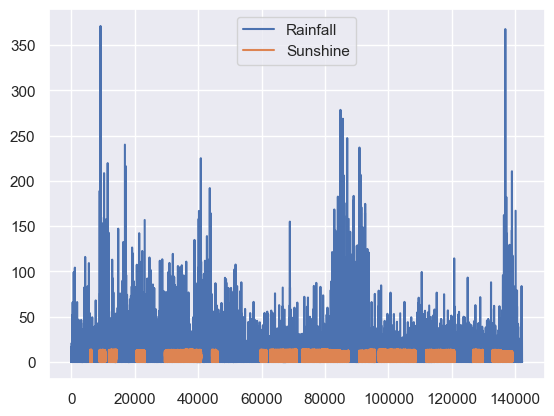

In [16]:
data[['Rainfall','Sunshine']].plot()

<Axes: >

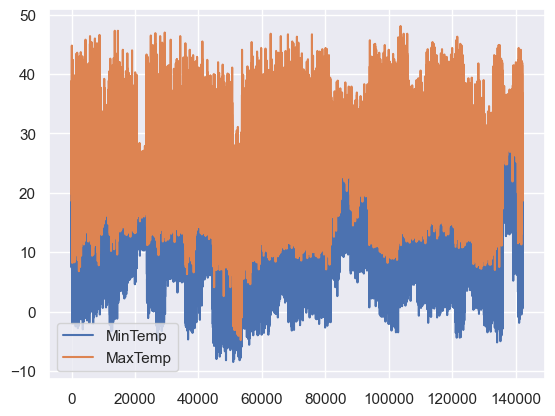

In [17]:
data[['MinTemp','MaxTemp']].plot()

<Axes: >

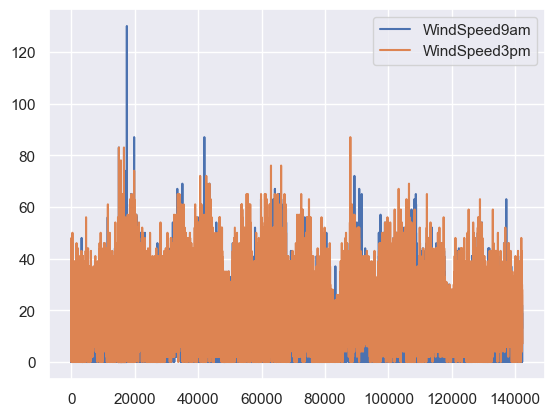

In [18]:
data[['WindSpeed9am','WindSpeed3pm']].plot()

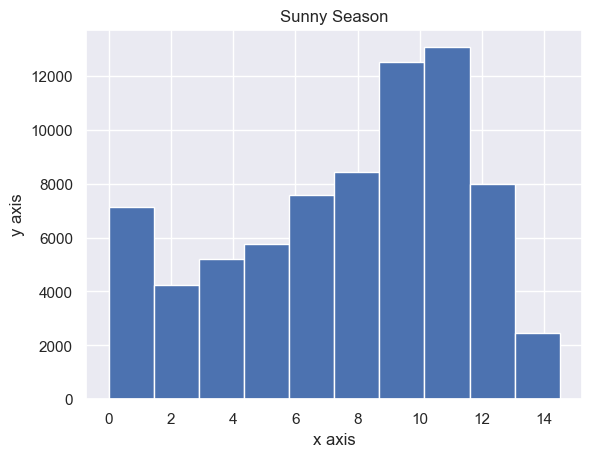

In [19]:
data['Sunshine'].hist()
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Sunny Season')
plt.show()

<Axes: xlabel='Pressure9am', ylabel='Density'>

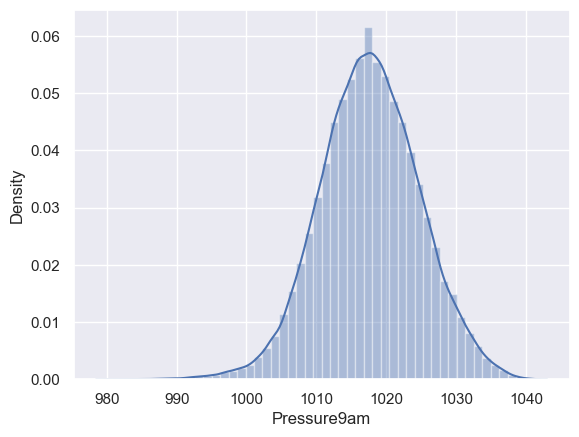

In [20]:
sns.distplot(data["Pressure9am"])

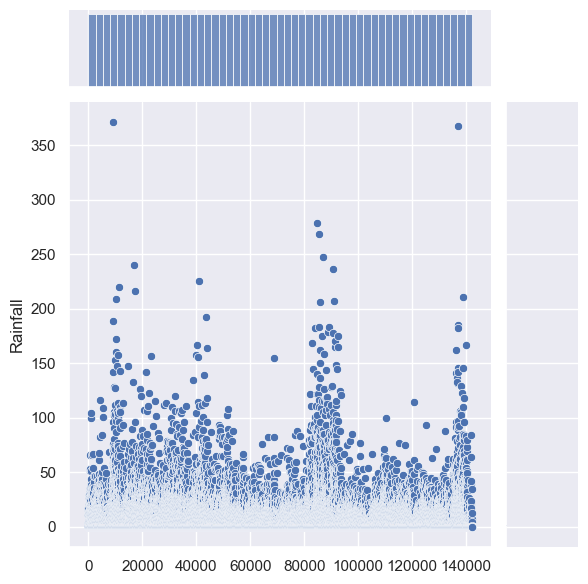

In [21]:
sns.jointplot(data['Rainfall'])

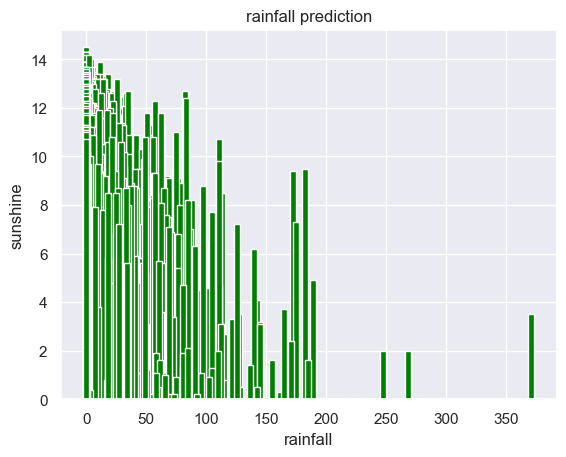

In [22]:
x=data['Rainfall']
y=data['Sunshine']
plt.bar(x,y,color='green',width=5)
plt.xlabel('rainfall')
plt.ylabel('sunshine')
plt.title('rainfall prediction')
plt.show()

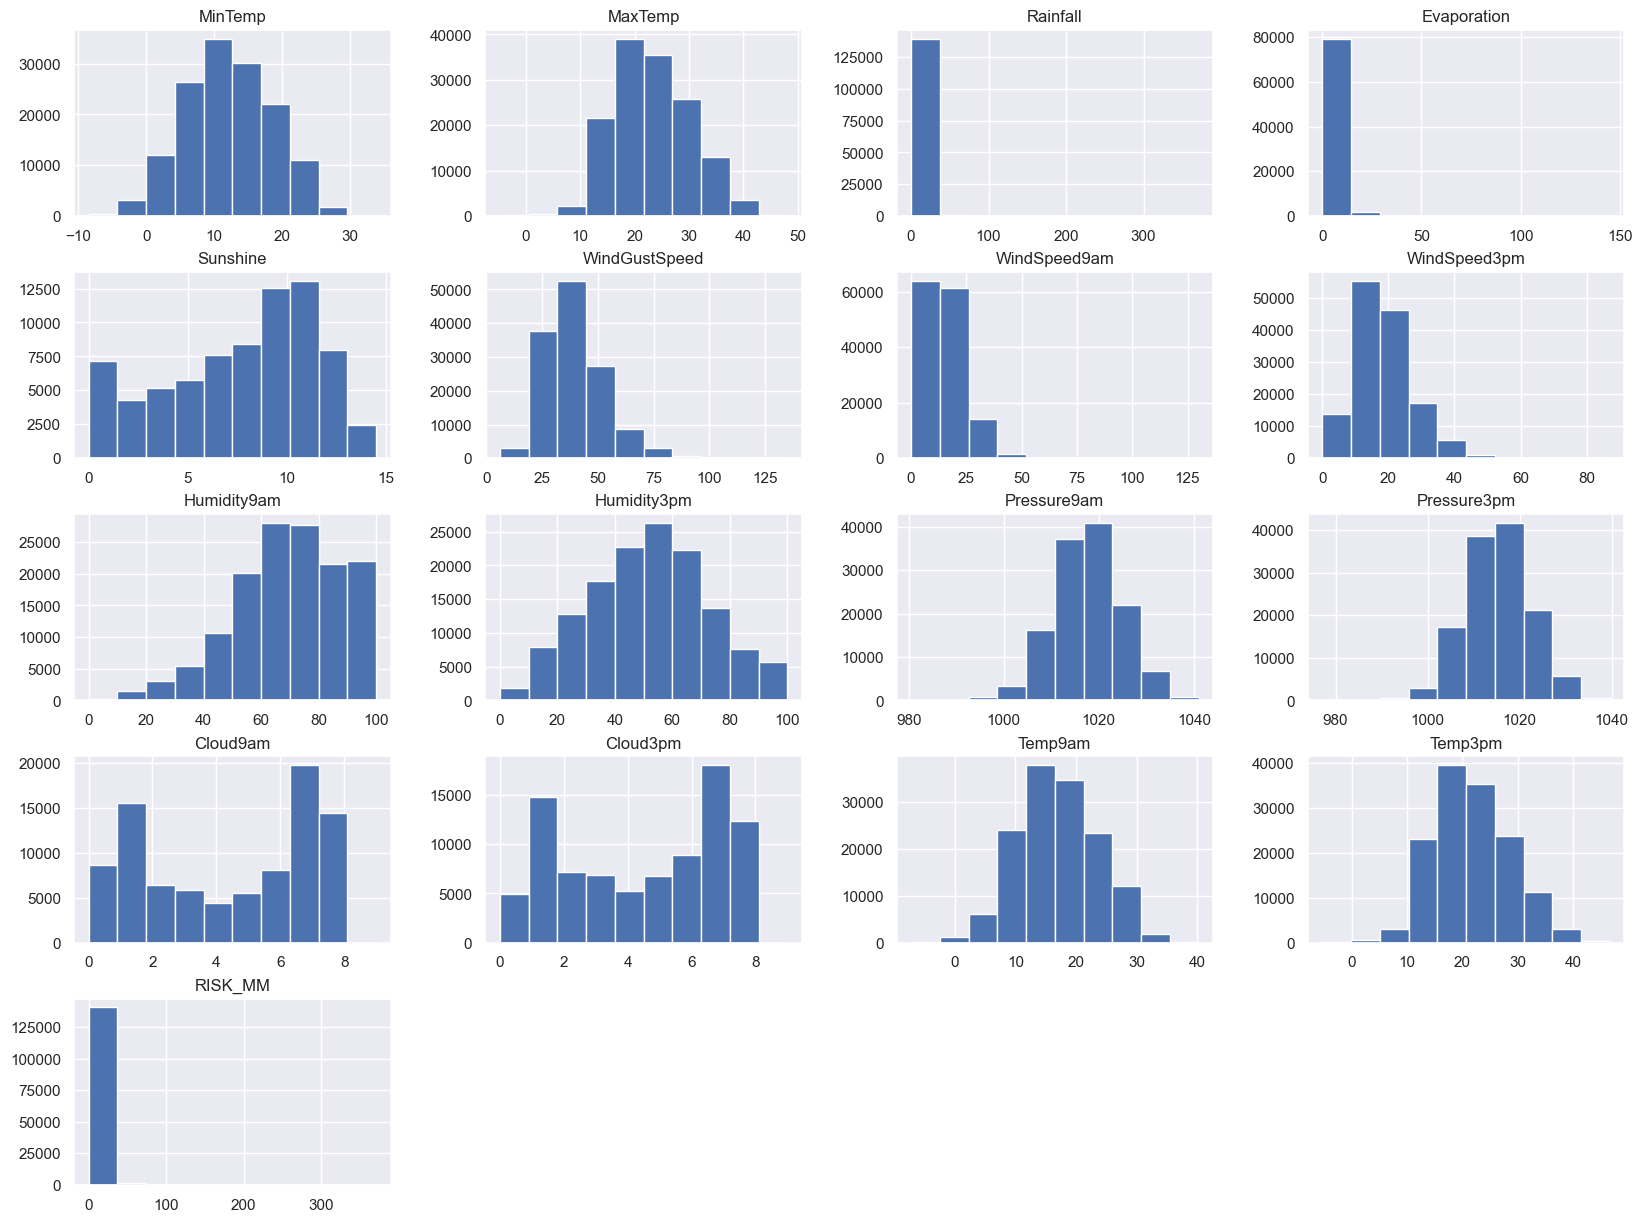

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (20,15))
ax = fig.gca()
data.hist(ax=ax)
plt.show()

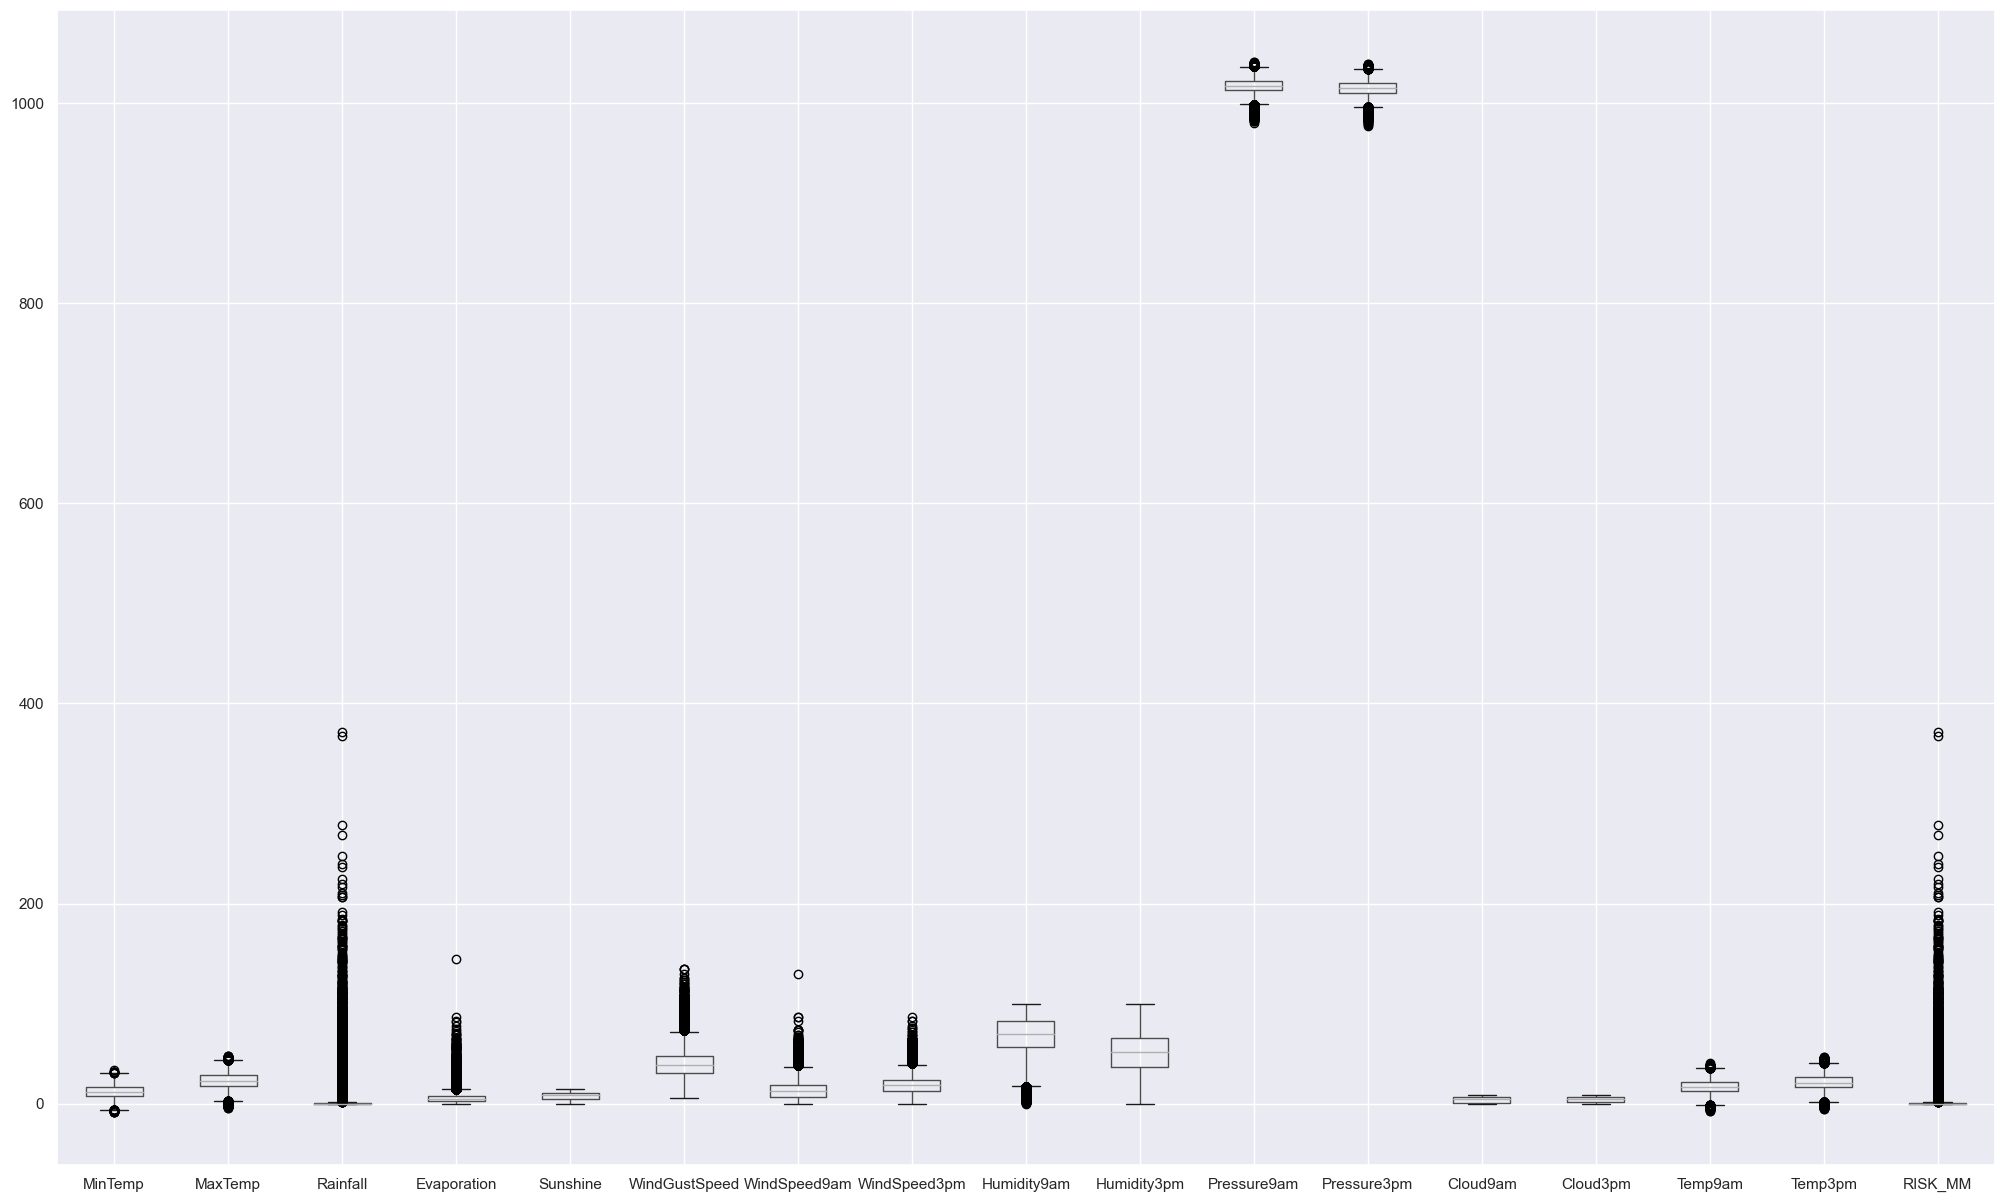

In [24]:
boxplot=data.boxplot(figsize=(25,15))

## Standardization Data

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scale = pd.DataFrame(scaler.fit_transform(df))

In [19]:
df_scale.columns = colum_name
df_scale['RainTomorrow'] = le.fit_transform(df_scale['RainTomorrow'])

In [20]:
df_scale.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.191328,-0.041360,-0.203581,-0.257221,-0.845389,1.045228,0.327736,1.328766,1.366458,0.677819,...,0.081409,-1.443652,-1.457215,-1.224564,0.995479,0.607941,-0.014071,0.023104,-0.529795,0
1,-0.751052,0.268745,-0.275097,-0.257221,-0.845389,1.258262,0.327736,-0.221338,1.586813,-1.124341,...,-1.318948,-1.297105,-1.026898,-1.119521,0.608406,0.607941,0.032447,0.387799,-0.529795,0
2,0.112796,0.353318,-0.275097,-0.257221,-0.845389,1.471296,0.479465,1.328766,1.586813,0.565184,...,-1.630138,-1.052860,-1.472054,-0.984466,0.608406,-1.454351,0.621667,0.227333,-0.529795,0
3,-0.468338,0.677518,-0.275097,-0.257221,-0.845389,-0.872075,-1.189550,0.442992,-1.718521,-0.335896,...,-1.267083,-1.736746,0.011799,-0.369217,0.608406,0.607941,0.171999,0.708731,-0.529795,0
4,0.835287,1.283631,-0.155903,-0.257221,-0.845389,1.045228,0.100143,-1.328556,-0.176032,-0.786436,...,0.651924,-0.906314,-0.997221,-1.389630,0.608406,1.020399,0.125481,1.175541,-0.529795,0


In [21]:
X = df_scale.drop(['RainTomorrow'],axis=1)
y = df_scale['RainTomorrow']

In [22]:
X.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,0.191328,-0.041360,-0.203581,-0.257221,-0.845389,1.045228,0.327736,1.328766,1.366458,0.677819,0.623294,0.081409,-1.443652,-1.457215,-1.224564,0.995479,0.607941,-0.014071,0.023104,-0.529795
1,-0.751052,0.268745,-0.275097,-0.257221,-0.845389,1.258262,0.327736,-0.221338,1.586813,-1.124341,0.394836,-1.318948,-1.297105,-1.026898,-1.119521,0.608406,0.607941,0.032447,0.387799,-0.529795
2,0.112796,0.353318,-0.275097,-0.257221,-0.845389,1.471296,0.479465,1.328766,1.586813,0.565184,0.851751,-1.630138,-1.052860,-1.472054,-0.984466,0.608406,-1.454351,0.621667,0.227333,-0.529795
3,-0.468338,0.677518,-0.275097,-0.257221,-0.845389,-0.872075,-1.189550,0.442992,-1.718521,-0.335896,-1.090136,-1.267083,-1.736746,0.011799,-0.369217,0.608406,0.607941,0.171999,0.708731,-0.529795
4,0.835287,1.283631,-0.155903,-0.257221,-0.845389,1.045228,0.100143,-1.328556,-0.176032,-0.786436,0.166379,0.651924,-0.906314,-0.997221,-1.389630,0.608406,1.020399,0.125481,1.175541,-0.529795


In [23]:
from yellowbrick.target import FeatureCorrelation
feature_names = list(X.columns)

### Feature Correlation 

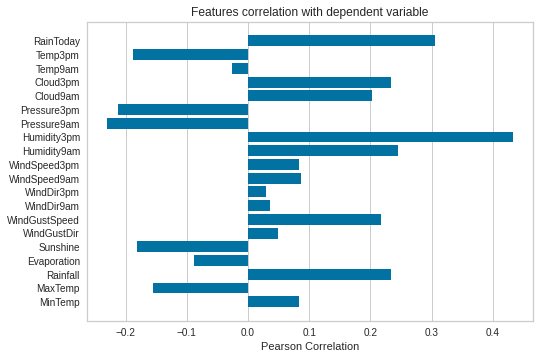

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [24]:
visualizer = FeatureCorrelation(labels = feature_names)
visualizer.fit(X, y)
visualizer.poof()

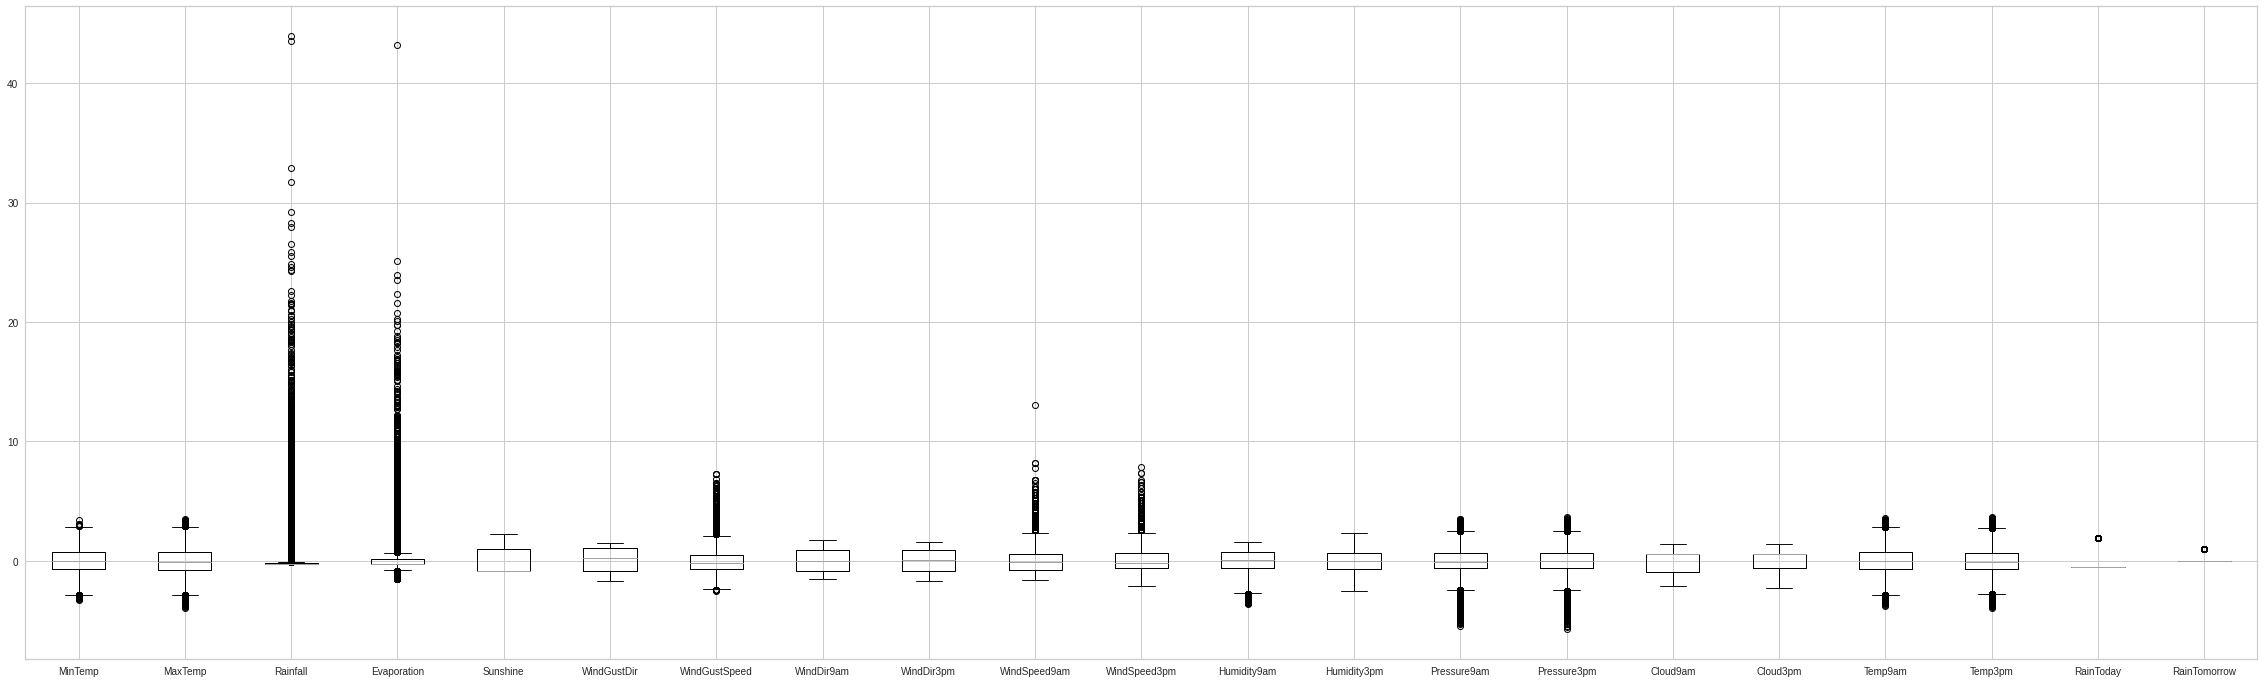

In [25]:
boxplot = df_scale.boxplot(figsize=(40, 12))

In [26]:
from sklearn.model_selection import train_test_split
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X, y, test_size = 0.33, random_state = 42)

##  Model 1 Before Removing Outlier  

In [27]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_s, y_train_s)

RandomForestClassifier()

In [28]:
y_pred_s = model.predict(X_test_s)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred_s,y_test_s)

0.8529436273488604

In [30]:
def drop_outliers(df,field_name):
    iqr = 1.5 * (np.percentile(df[field_name],75) - np.percentile(df[field_name],25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index , inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25))].index , inplace=True)

In [31]:
df_scale.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [32]:
drop_outliers(df_scale,'MinTemp')
drop_outliers(df_scale,'Rainfall')
drop_outliers(df_scale,'Evaporation')
drop_outliers(df_scale,'WindGustSpeed')
drop_outliers(df_scale,'WindSpeed9am')
drop_outliers(df_scale,'WindSpeed3pm')
drop_outliers(df_scale,'Humidity9am')
drop_outliers(df_scale,'Pressure9am')
drop_outliers(df_scale,'Pressure3pm')
drop_outliers(df_scale,'Temp9am')
drop_outliers(df_scale,'Temp3pm')

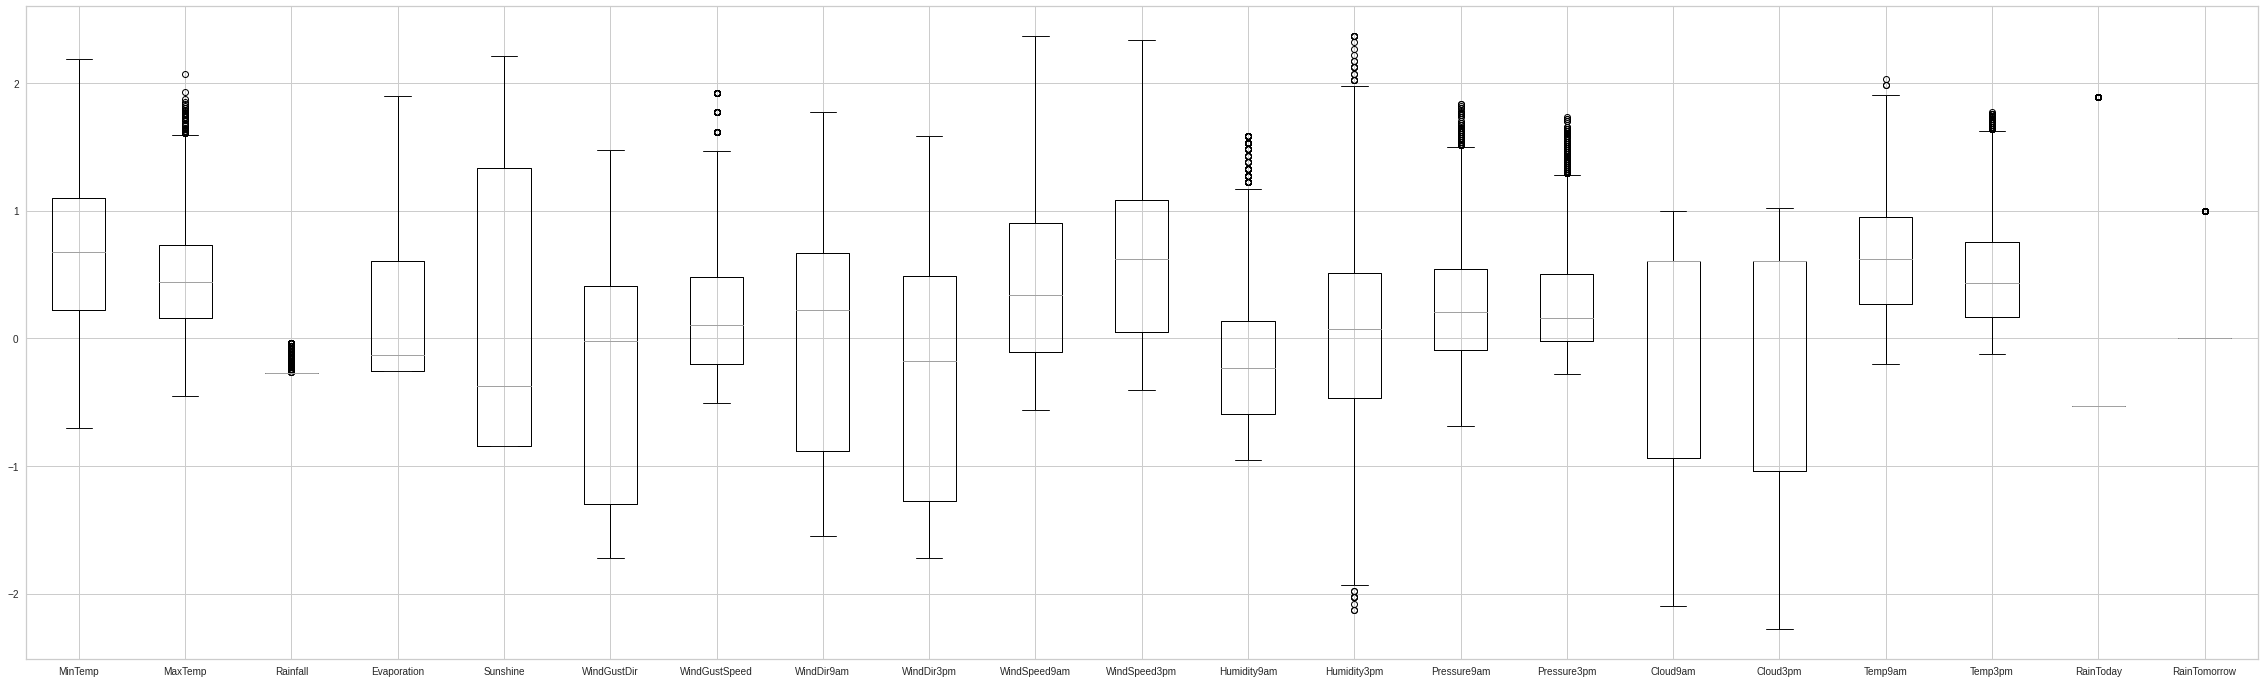

In [33]:
boxplot = df_scale.boxplot(figsize=(40, 12))

In [34]:
df_scale.shape

(7839, 21)

In [35]:
X = df_scale.drop(['RainTomorrow'],axis=1)
y = df_scale['RainTomorrow']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Model 2 After Removing Outlier 

In [37]:
model_2 = RandomForestClassifier()
model_2.fit(X_train, y_train)

RandomForestClassifier()

In [38]:
y_pred = model_2.predict(X_test)

In [39]:
accuracy_score(y_pred,y_test)

0.8960459183673469

## Model 3 Drop Less Corr. Features 

In [40]:
X_less_corr = df_scale.drop(['RainTomorrow','MaxTemp','Pressure9am','Pressure3pm','Sunshine','Temp3pm'],axis=1)
y_less_corr = df_scale['RainTomorrow']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_less_corr, y_less_corr, test_size = 0.2)

In [42]:
model_3 = RandomForestClassifier()
model_3.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
y_lcorr_pred = model_3.predict(X_test)

In [44]:
accuracy_score(y_lcorr_pred,y_test)

0.9132653061224489